[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/charlesincharge/Caltech-CS155-2022/blob/main/sets/set1/4_notebook.ipynb)

# Problem 4

Use this notebook to write your code for problem 4 by filling in the sections marked `# TODO` and running all cells.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set1/perceptron_helper.py', 'perceptron_helper.py')


from perceptron_helper import (
    predict,
    plot_data,
    boundary,
    plot_perceptron,
)

%matplotlib inline

## Implementation of Perceptron

First, we will implement the perceptron algorithm. Fill in the `update_perceptron()` function so that it finds a single misclassified point and updates the weights and bias accordingly. If no point exists, the weights and bias should not change.

Hint: You can use the `predict()` helper method, which labels a point 1 or -1 depending on the weights and bias.

In [ ]:
def update_perceptron(X, Y, w, b):
    """
    This method updates a perceptron model. Takes in the previous weights
    and returns weights after an update, which could be nothing.
    
    Inputs:
        X: A (N, D) shaped numpy array containing a single point.
        Y: A (N, ) shaped numpy array containing the labels for the points.
        w: A (D, ) shaped numpy array containing the weight vector.
        b: A float containing the bias term.
    
    Output:
        next_w: A (D, ) shaped numpy array containing the next weight vector
                after updating on a single misclassified point, if one exists.
        next_b: The next float bias term after updating on a single
                misclassified point, if one exists.
        misclassified: The misclassified point used to update perceptron.
    """


    next_w, next_b = np.copy(w), np.copy(b)
    misclassified = None
    #f_vals = np.dot(X, w) + b
    incorrect_ind = []
    for i in range(len(X)):
      if (predict(X[i].T,w,b)!=Y[i]):
        incorrect_ind.append(i)
    #print(incorrect_ind)
    if len(incorrect_ind) != 0:
      
      random_ind = incorrect_ind[0]
      misclassified = random_ind
      next_w = next_w + Y[random_ind] * X[random_ind].T
      next_b = next_b + Y[random_ind]
    print("Weights: ", next_w)
    print("Bias: ", next_b)
    if(misclassified != None):
      print("Misclassified x: ", X[misclassified])
      print("Misclassified y: ", Y[misclassified])
    #==============================================
    # TODO: Implement update rule for perceptron.
    #===============================================
    
    return next_w, next_b, misclassified

Next you will fill in the `run_perceptron()` method. The method performs single updates on a misclassified point until convergence, or max_iter updates are made. The function will return the final weights and bias. You should use the `update_perceptron()` method you implemented above.

In [ ]:
def run_perceptron(X, Y, w, b, max_iter):
    """
    This method runs the perceptron learning algorithm. Takes in initial weights
    and runs max_iter update iterations. Returns final weights and bias.
    
    Inputs:
        X: A (N, D) shaped numpy array containing a single point.
        Y: A (N, ) shaped numpy array containing the labels for the points.
        w: A (D, ) shaped numpy array containing the initial weight vector.
        b: A float containing the initial bias term.
        max_iter: An int for the maximum number of updates evaluated.
        
    Output:
        w: A (D, ) shaped numpy array containing the final weight vector.
        b: The final float bias term.
    """
    t = 0
    for i in range(max_iter):
      print("t: ", t)
      update = update_perceptron(X, Y, w, b)
      w = update[0]
      b = update[1]
      if update[2] == None:
        break
      t+=1

    #============================================
    # TODO: Implement perceptron update loop.
    #=============================================

    return w, b

# Problem 4A

## Visualizing a Toy Dataset

We will begin by training our perceptron on a toy dataset of 3 points. The green points are labelled +1 and the red points are labelled -1. We use the helper function `plot_data()` to do so.

In [ ]:
X = np.array([[ -3, -1], [0, 3], [1, -2]])
Y = np.array([ -1, 1, 1])

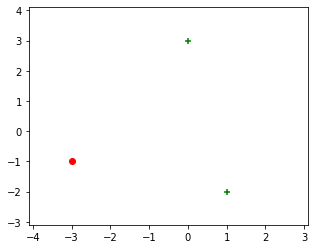

In [ ]:
fig = plt.figure(figsize=(5,4))
ax = fig.gca(); ax.set_xlim(-4.1, 3.1); ax.set_ylim(-3.1, 4.1)
plot_data(X, Y, ax)

## Running the Perceptron

Next, we will run the perceptron learning algorithm on this dataset. Update the code to show the weights and bias at each timestep and the misclassified point used in each update.  

Run the below code, and fill in the corresponding table in the set.

In [ ]:
# Initialize weights and bias.
weights = np.array([0.0, 1.0])
bias = 0.0

weights, bias = run_perceptron(X, Y, weights, bias, 16)

print()
print ("final w = %s, final b = %.1f" % (weights, bias))

t:  0
Weights:  [ 1. -1.]
Bias:  1.0
Misclassified x:  [ 1 -2]
Misclassified y:  1
t:  1
Weights:  [1. 2.]
Bias:  2.0
Misclassified x:  [0 3]
Misclassified y:  1
t:  2
Weights:  [2. 0.]
Bias:  3.0
Misclassified x:  [ 1 -2]
Misclassified y:  1
t:  3
Weights:  [2. 0.]
Bias:  3.0

final w = [2. 0.], final b = 3.0


## Visualizating the Perceptron

Getting all that information in table form isn't very informative. Let us visualize what the decision boundaries are at each timestep instead.

The helper functions `boundary()` and `plot_perceptron()` plot a decision boundary given a perceptron weights and bias. Note that the equation for the decision boundary is given by:

$$w_1x_1 + w_2x_2 + b = 0.$$ 

Using some algebra, we can obtain $x_2$ from $x_1$ to plot the boundary as a line. 

$$x_2 = \frac{-w_1x_1 - b}{w_2}. $$

Below is a redefinition of the `run_perceptron()` method to visualize the points and decision boundaries at each timestep instead of printing.  Fill in the method using your previous `run_perceptron()` method, and the above helper methods.

Hint: The axs element is a list of Axes, which are used as subplots for each timestep. You can  do the following:
```
ax = axs[i]
```
to get the plot correponding to $t = i$. You can then use ax.set_title() to title each subplot. You will want to use the `plot_data()` and `plot_perceptron()` helper methods.

In [ ]:
def run_perceptron(X, Y, w, b, axs, max_iter):
    """
    This method runs the perceptron learning algorithm and plots data, weight, and bias at each timestep. 
    Takes in initial weights and runs max_iter update iterations. Returns final weights and bias.
    
    Inputs:
        X: A (N, D) shaped numpy array containing a single point.
        Y: A (N, ) shaped numpy array containing the labels for the points.
        w: A (D, ) shaped numpy array containing the initial weight vector.
        b: A float containing the initial bias term.
        axs: A list of Axes that contain suplots for each timestep. 
        max_iter: An int for the maximum number of updates evaluated.
        
    Output:
        The final weight and bias vectors.
    """
    
    #============================================
    # TODO: Implement perceptron update loop.
    #=============================================

    for i in range(max_iter):
      update = update_perceptron(X, Y, w, b)
      plot_data(X, Y, axs[i])
      plot_perceptron(w,b, axs[i])
      w = update[0]
      b = update[1]
      #print(update[2])
      if update[2] == None:
        break


    return w, b

Run the below code to get a visualization of the perceptron algorithm. The red region are areas the perceptron thinks are negative examples.

Weights:  [ 1. -1.]
Bias:  1.0
Misclassified x:  [ 1 -2]
Misclassified y:  1
Weights:  [1. 2.]
Bias:  2.0
Misclassified x:  [0 3]
Misclassified y:  1
Weights:  [2. 0.]
Bias:  3.0
Misclassified x:  [ 1 -2]
Misclassified y:  1
Weights:  [2. 0.]
Bias:  3.0


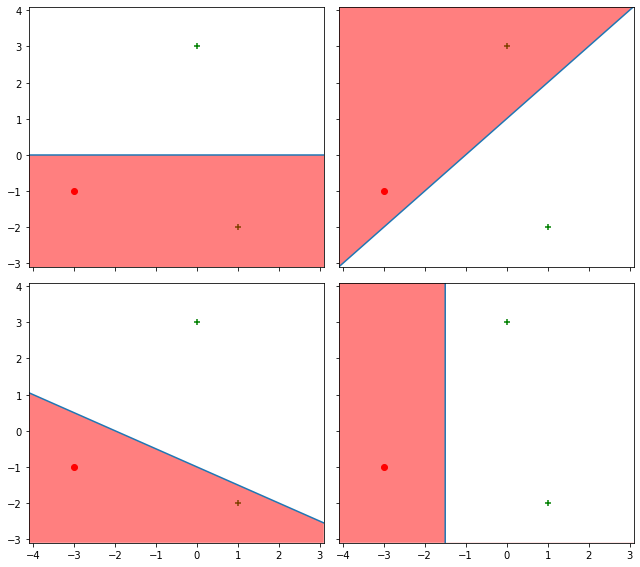

In [ ]:
# Initialize weights and bias.
weights = np.array([0.0, 1.0])
bias = 0.0

f, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9,8))
axs = list(itertools.chain.from_iterable(ax_arr))
for ax in axs:
    ax.set_xlim(-4.1, 3.1); ax.set_ylim(-3.1, 4.1)

run_perceptron(X, Y, weights, bias, axs, 4)

f.tight_layout()

# Problem 4C

## Visualize a Non-linearly Separable Dataset.

We will now work on a dataset that cannot be linearly separated, namely one that is generated by the XOR function.

In [ ]:
X = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

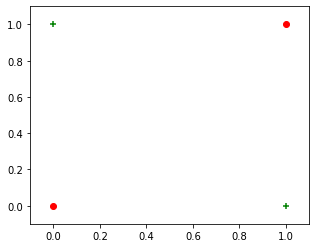

In [ ]:
fig = plt.figure(figsize=(5,4))
ax = fig.gca(); ax.set_xlim(-0.1, 1.1); ax.set_ylim(-0.1, 1.1)
plot_data(X, Y, ax)

We will now run the perceptron algorithm on this dataset. We will limit the total timesteps this time, but you should see a pattern in the updates. Run the below code.

[2, 3]
y:  -1
x:  [0 0]
y*x:  [0 0]
Weights:  [0. 1.]
Bias:  -1.0
Misclassified:  2
2
[1, 3]
y:  1
x:  [1 0]
y*x:  [1 0]
Weights:  [1. 1.]
Bias:  0.0
Misclassified:  1
1
[2, 3]
y:  -1
x:  [0 0]
y*x:  [0 0]
Weights:  [1. 1.]
Bias:  -1.0
Misclassified:  2
2
[3]
y:  -1
x:  [1 1]
y*x:  [-1 -1]
Weights:  [0. 0.]
Bias:  -2.0
Misclassified:  3
3
[0, 1]
y:  1
x:  [0 1]
y*x:  [0 1]
Weights:  [0. 1.]
Bias:  -1.0
Misclassified:  0
0
[1, 3]
y:  1
x:  [1 0]
y*x:  [1 0]
Weights:  [1. 1.]
Bias:  0.0
Misclassified:  1
1
[2, 3]
y:  -1
x:  [0 0]
y*x:  [0 0]
Weights:  [1. 1.]
Bias:  -1.0
Misclassified:  2
2
[3]
y:  -1
x:  [1 1]
y*x:  [-1 -1]
Weights:  [0. 0.]
Bias:  -2.0
Misclassified:  3
3
[0, 1]
y:  1
x:  [0 1]
y*x:  [0 1]
Weights:  [0. 1.]
Bias:  -1.0
Misclassified:  0
0
[1, 3]
y:  1
x:  [1 0]
y*x:  [1 0]
Weights:  [1. 1.]
Bias:  0.0
Misclassified:  1
1
[2, 3]
y:  -1
x:  [0 0]
y*x:  [0 0]
Weights:  [1. 1.]
Bias:  -1.0
Misclassified:  2
2
[3]
y:  -1
x:  [1 1]
y*x:  [-1 -1]
Weights:  [0. 0.]
Bias:  -2.0

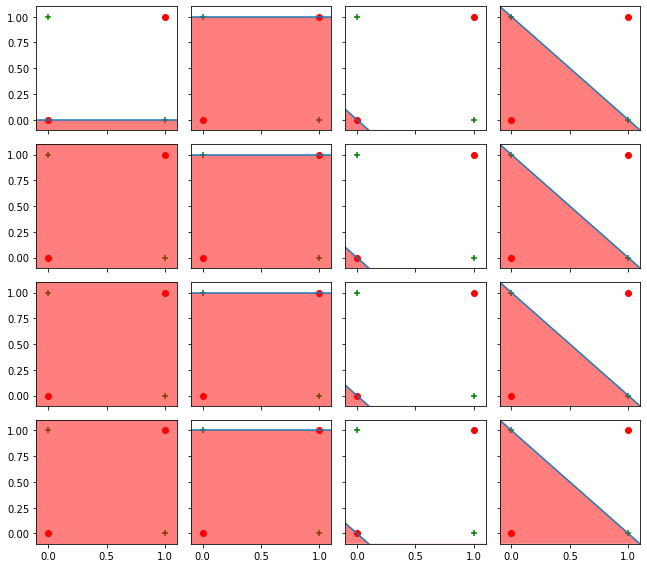

In [ ]:
# Initialize weights and bias.
weights = np.array([0.0, 1.0])
bias = 0.0

f, ax_arr = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(9,8))
axs = list(itertools.chain.from_iterable(ax_arr))
for ax in axs:
    ax.set_xlim(-0.1, 1.1); ax.set_ylim(-0.1, 1.1)
    
run_perceptron(X, Y, weights, bias, axs, 16)

f.tight_layout()